In [ ]:
# Importing neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import warnings
warnings.filterwarnings("ignore")

In [6]:
#1. Loading and Preparing the MNIST Dataset
print("Loading MNIST dataset...")
# fetch_openml will download the dataset if not already cached
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

X = mnist["data"]
y = mnist["target"].astype(np.uint8)
print("Dataset loaded.")

Loading MNIST dataset...
Dataset loaded.


In [7]:
# Normalize the pixel values to be between 0 and 1
# Not strictly necessary for t-SNE but good for other algorithms
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print("Dataset scaled.")

Dataset scaled.


In [8]:
# 2. Taking 1000 sample data for faster and easier visualisation
n_samples = 1000
# for consistent results
np.random.seed(42)
indices = np.random.permutation(X.shape[0])[:n_samples]
X_sample = X[indices]
y_sample = y[indices]

print(f"Using a random sample of {n_samples} images.")

Using a random sample of 1000 images.


In [38]:
# 3. Defining Plotting Functions

# Plotting function 1: Scatter plot with colored dots
def plot_reduction_scatter(X_reduced, y, title):
    #Plots the reduced-dimension data as a colored scatter plot.
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 10), s=10)

    plt.title(title, fontsize=16)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.colorbar(scatter, ticks=range(10), label='Digit Class')
    plt.grid(True)
    plt.show()

# Plotting function 2: Scatter plot with digit labels
def plot_reduction_digits(X_reduced, y, title):
    """Plots the reduced-dimension data using digit labels instead of dots."""
    plt.figure(figsize=(12, 10))
    cmap = plt.cm.get_cmap("jet", 10)
    for i in range(10):
        # Find all points belonging to class i
        points = X_reduced[y == i]
        plt.scatter(points[:, 0], points[:, 1], color=cmap(i), label=str(i), s=15)

    plt.title(title, fontsize=16)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()



In [21]:
# %% 4. Apply t-SNE
print("\nRunning t-SNE...")
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
start_time = time.time()
X_tsne_reduced = tsne.fit_transform(X_sample)
end_time = time.time()
print(f"t-SNE completed in {end_time - start_time:.2f} seconds.")


Running t-SNE...
t-SNE completed in 4.30 seconds.


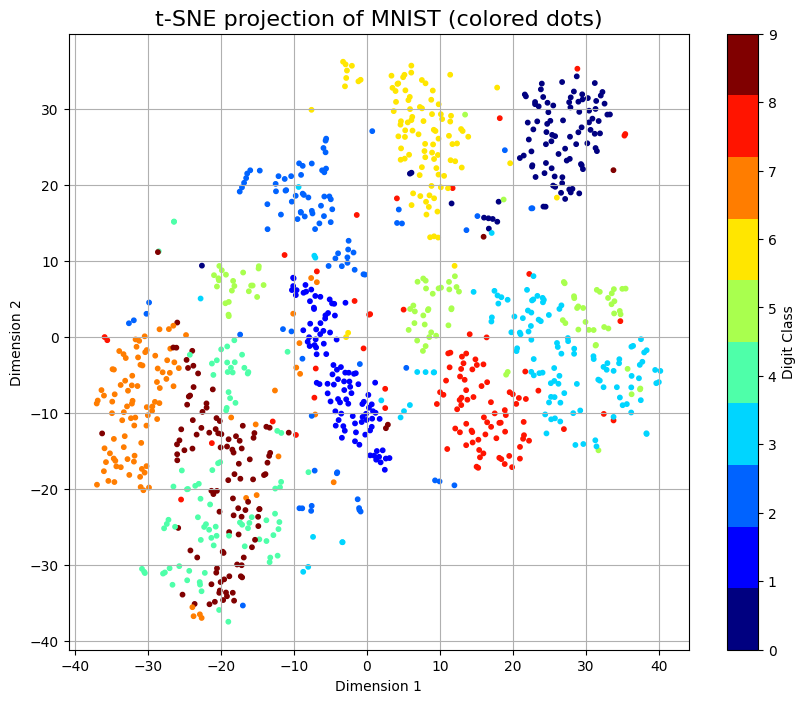

In [39]:
# Plot the results of t-SNE
plot_reduction_scatter(X_tsne_reduced, y_sample, "t-SNE projection of MNIST (colored dots)")

In [40]:
# 5. Comparison with Other Algorithms
print("\nRunning other dimensionality reduction algorithms for comparison.")
algorithms = {}

# PCA
print("Running PCA...")
pca = PCA(n_components=2, random_state=42)
start_time = time.time()
algorithms['PCA'] = pca.fit_transform(X_sample)
end_time = time.time()
print(f"PCA completed in {end_time - start_time:.2f} seconds.")

# LLE (Locally Linear Embedding)
print("Running LLE...")
# LLE can be sensitive to n_neighbors
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15, random_state=42, n_jobs=-1)
start_time = time.time()
algorithms['LLE'] = lle.fit_transform(X_sample)
end_time = time.time()
print(f"LLE completed in {end_time - start_time:.2f} seconds.")

# MDS (Multi-Dimensional Scaling)
print("Running MDS...")
mds = MDS(n_components=2, random_state=42, n_jobs=-1)
start_time = time.time()
algorithms['MDS'] = mds.fit_transform(X_sample)
end_time = time.time()
print(f"MDS completed in {end_time - start_time:.2f} seconds.")

# Add t-SNE result to the dictionary for comparison plot
algorithms['t-SNE'] = X_tsne_reduced


Running other dimensionality reduction algorithms for comparison.
Running PCA...
PCA completed in 0.12 seconds.
Running LLE...
LLE completed in 0.73 seconds.
Running MDS...
MDS completed in 14.89 seconds.


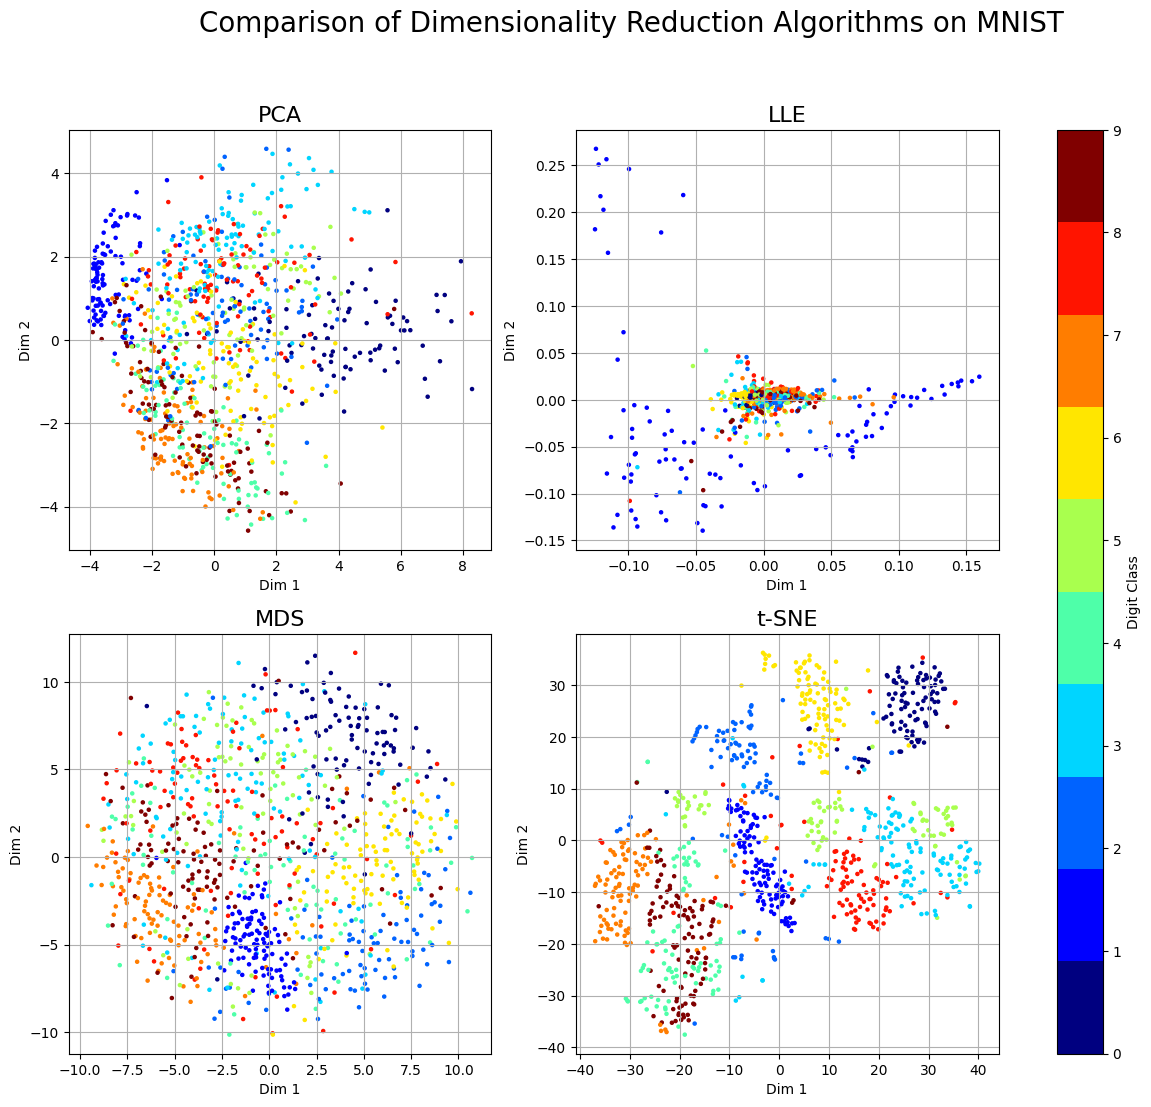

In [42]:
#6. Plotting all results for comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparison of Dimensionality Reduction Algorithms on MNIST', fontsize=20)
axes = axes.ravel()

for i, (name, X_reduced) in enumerate(algorithms.items()):
    ax = axes[i]
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, cmap=plt.cm.get_cmap("jet", 10), s=5)
    ax.set_title(name, fontsize=16)
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")
    ax.grid(True)

# Add a single colorbar for the whole figure
fig.colorbar(scatter, ax=axes, ticks=range(10), label='Digit Class')
plt.show()

In [43]:
#So, we can observe clear seggregation in t-SNE